In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.express as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.shape

(6435, 8)

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


#### Which store has maximum sales

In [8]:
max_value = df.groupby('Store')['Weekly_Sales'].sum()
print("Store {} has maximum sales. Maximum sales is {}".format(max_value.idxmax(),max_value.max()))

Store 20 has maximum sales. Maximum sales is 301397792.46


#### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
std_value = df.groupby('Store')['Weekly_Sales'].std()
print("Store {} has maximum standard deviation. Maximum standard deviation is {}".format(std_value.idxmax(),std_value.max()))

Store 14 has maximum standard deviation. Maximum standard deviation is 317569.9494755081


#### coefficient of mean to standard deviation

In [10]:
mean_data = df['Weekly_Sales'].mean()
std_data = df['Weekly_Sales'].std()
coefficient = std_data/mean_data
print("Coefficient of mean to standard deviation is {}".format(coefficient))

Coefficient of mean to standard deviation is 0.5390501956169006


#### coefficient of mean to standard deviation in store wise

In [11]:
df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()

Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64

In [12]:
# sns.pairplot(df)

### Which store/s has good quarterly growth rate in Q3’2012

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [14]:
def quarterData(month):
    if month <= 3:
        return 'Q1'
    elif month > 3 and month <= 6:
        return 'Q2'
    elif month > 6 and month <= 9:
        return 'Q3'
    else:
        return 'Q4'
    
df['Quarter'] = df['Date'].dt.month.apply(quarterData)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,Q1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Q1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,Q1


In [15]:
quarter_value = df[(df['Quarter'] == 'Q3') & (df['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum()

In [16]:
print("Store {} has good quarterly growth rate in Q3-2012 {}".format(quarter_value.idxmax(),quarter_value.max()))

Store 4 has good quarterly growth rate in Q3-2012 27796792.46


### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [17]:
total = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
print('Total Value is ' + str(total))

mean_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
print('Mean Value for non holiday ' + str(mean_non_holiday))

Total Value is 505299551.56
Mean Value for non holiday 1041256.3802088555


In [18]:
non_holiday_data = df[(df['Holiday_Flag'] == 1) & (df['Weekly_Sales'] > mean_non_holiday)]
non_holiday_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,Q1
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,Q3
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,Q4
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,Q1
...,...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12,Q4
5825,41,2012-02-10,1238844.56,1,22.00,3.103,196.919506,6.589,2012,2,Q1
5855,41,2012-09-07,1392143.82,1,67.41,3.596,198.095048,6.432,2012,9,Q3
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11,Q4


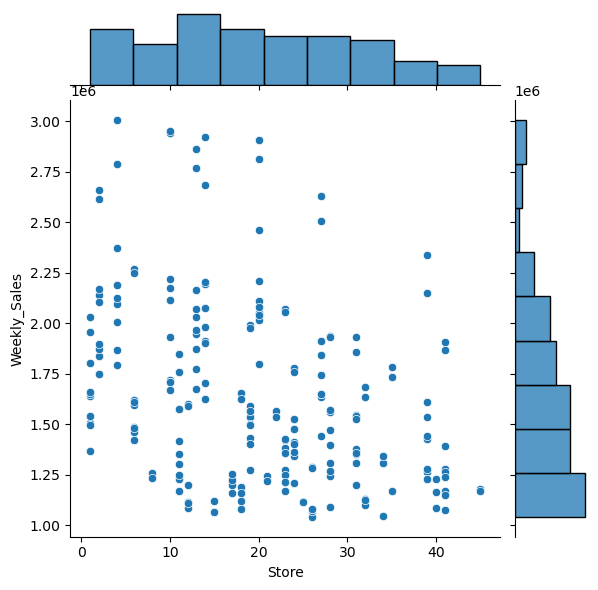

In [19]:
sns.jointplot(x='Store', y='Weekly_Sales', data=non_holiday_data)

### Provide a monthly and semester view of sales in units and give insights

#### Monthly View

In [20]:
monthly_view_data = df[['Month', 'Weekly_Sales']].groupby(['Month']).sum()
monthly_view_data

,Weekly_Sales
Month,
1,3.325984e+08
2,5.687279e+08
3,5.927859e+08
4,6.468598e+08
5,5.571256e+08
6,6.226299e+08
7,6.500010e+08
8,6.130902e+08
9,5.787612e+08


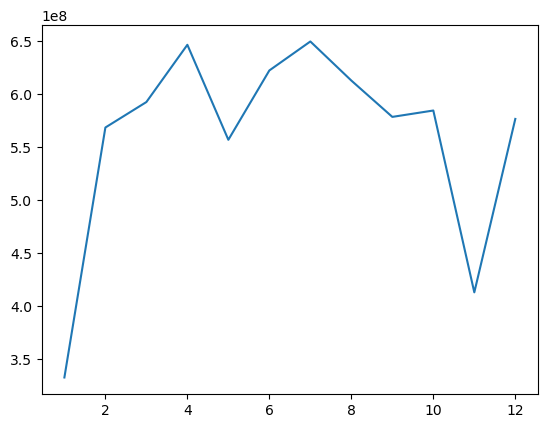

In [21]:
plt.plot(monthly_view_data)
plt.show()

<BarContainer object of 12 artists>

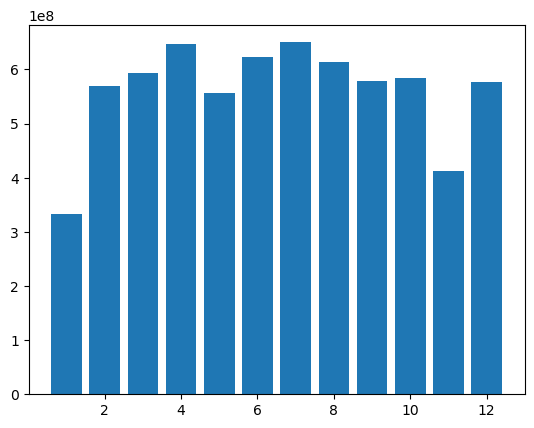

In [22]:
index_data = monthly_view_data.reset_index()
plt.bar(index_data['Month'], index_data['Weekly_Sales'])

#### Semester View

In [23]:
def semisterData(month):
    if month <= 6:
        return '1'
    else:
        return '2'

df['Semester'] = df['Date'].dt.month.apply(semisterData)
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter,Semester
0,1,2010-02-05,1643690.9,0,42.31,2.572,211.096358,8.106,2010,2,Q1,1


<BarContainer object of 2 artists>

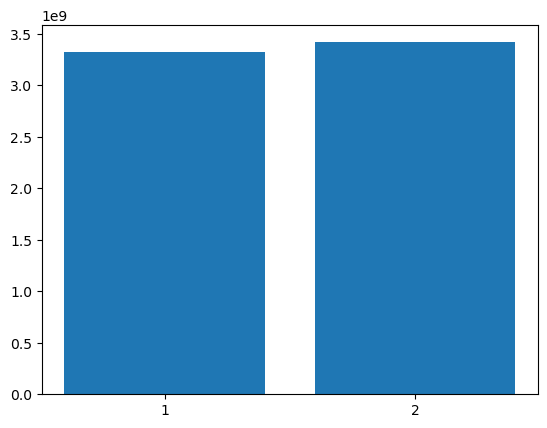

In [24]:
semester_view_data = df[['Semester', 'Weekly_Sales']].groupby(['Semester']).sum().reset_index()
plt.bar(semester_view_data['Semester'], semester_view_data['Weekly_Sales'])

In [25]:
df = df.drop(['Quarter', 'Semester', 'Year', 'Month', 'Date'], axis=1)
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.9,0,42.31,2.572,211.096358,8.106


In [26]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

## For Store 1 – Build  prediction models to forecast demand

#### 1. Linear Regression :– Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales. <br> 2. Change dates into days by creating new variable.

#### Change dates into days by creating new variable.

### Select the model which gives best accuracy.

In [27]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
plot = py.imshow(df.corr(), text_auto=True, aspect="auto", color_continuous_scale='blues')
plot.show()

In [29]:
x = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']
x.head(1)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106


##### Train Model

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 21)

In [31]:
X_train.shape, X_test.shape

((5148, 6), (1287, 6))

### Linear Regrassion

In [42]:
# Call in the LinearRegression object
lr = LinearRegression()

# fit train and test data.
lr.fit(X_train, Y_train)

LinearRegression()

In [43]:
lr.score(X_train, Y_train)

0.1389565042502907

In [33]:
pred = lr.predict(x)

In [34]:
r2_score(y, pred)

0.14155446020106954

#### Using OLS Formula

In [37]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [39]:
model1 = smf.ols('Weekly_Sales~Store+Holiday_Flag+Temperature+Fuel_Price+CPI+Unemployment', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     176.7
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          9.33e-209
Time:                        10:45:59   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6428   BIC:                         1.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.996e+06   7.54e+04     26.461      0.000    1.85e+06    2.14e+06
Store        -1.539e+04    521.895    -29.486      0.000   -1.64e+04   -1.44e+04
Holiday_Flag  7.303e+04   2.59e+04      2.815      0.005    2.22e+04    1.24e+05
Temperature   -975.4019    375.974     -2.594      0.009   -1712.436    -238.367
Fuel_Price    9596.0739   1.48e+04      0.648      0.517   -1.94e+04    3.86e+04
CPI          -2319.4558    184.772    -12.553      0.000   -2681.670   -1957.241
Unemployment -2.188e+04   3788.000     -5.776      0.000   -2.93e+04   -1.45e+04
==============================================================================
Omnibus:                      188.961   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.250
Skew:                           0.435   Prob(JB):                     2.69e-45
Kurtosis:                       3.100   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Build the model on training data

In [41]:
model2 = sm.OLS(Y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              3170.
Date:                Thu, 10 Aug 2023   Prob (F-statistic):                        0.00
Time:                        10:46:46   Log-Likelihood:                         -75318.
No. Observations:                5148   AIC:                                  1.506e+05
Df Residuals:                    5142   BIC:                                  1.507e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store        -1.377e+04    608.054    -22.650      0.000    -1.5e+04   -1.26e+04
Holiday_Flag  1.136e+05      3e+04      3.787      0.000    5.48e+04    1.72e+05
Temperature  -1109.2088    437.120     -2.538      0.011   -1966.151    -252.267
Fuel_Price    2.985e+05   1.17e+04     25.568      0.000    2.76e+05    3.21e+05
CPI            886.5062    167.089      5.306      0.000     558.941    1214.072
Unemployment  3.131e+04   3727.627      8.398      0.000     2.4e+04    3.86e+04
==============================================================================
Omnibus:                      133.116   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.596
Skew:                           0.404   Prob(JB):                     1.09e-31
Kurtosis:                       2.884   Cond. No.                         738.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred = model2.predict(test_X)
pred

In [ ]:
mean_squared_error(y, pred)

In [ ]:
test_X.iloc[:1,:].to_csv("New_data_for_Walmart.csv", index = False)

In [ ]:
new_data = pd.read_csv("New_data_for_Walmart.csv")
new_data

In [ ]:
pred_y_new = model2.predict(new_data)
pred_y_new

In [ ]:
new_data["Predicted_WeeklySales"] = pred_y_new
new_data

In [ ]:
new_data.to_csv("Predicted Results of New Data.csv")

### Use Linear Regression Model

In [ ]:
print("X Train shape : {}".format(train_X.shape))
print("Y Train shape : {}".format(train_Y.shape))
print("X Test shape : {}".format(test_X.shape))
print("Y Test shape : {}".format(test_Y.shape))

In [ ]:
# Prediction
pred = lr.predict(test_X)
pred

In [ ]:
test_Y

In [ ]:
#Mean Squared Error
mean_squared_error(test_Y, pred)

In [ ]:
mean_absolute_error(test_Y, pred)

In [ ]:
r2_score(test_Y, pred)

In [ ]:
lr.coef_

In [ ]:
train_pred = lr.predict(train_X)

In [ ]:
r2_score(train_Y, train_pred)

### Model is facing Underfiting Isuue

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
## Lasso Regression
ls = Lasso()

# fit train data.
ls.fit(train_X, train_Y)

In [ ]:
ls_pred = ls.predict(test_X)

In [ ]:
r2_score(test_Y, ls_pred)

In [ ]:
ls_train_pred = ls.predict(train_X)

In [ ]:
r2_score(train_Y, ls_train_pred)